<h1> Pokemon Data Analysis - Are All Pokemon Made Equal? </h1>

<h2> Import Libraries and Dataset </h2>

In [443]:
import pandas as pd
import matplotlib.pyplot as plt
from pySankey.sankey import sankey
import seaborn as sns
import numpy as np

In [444]:
df = pd.read_csv('pokemon_data.csv')
df.set_index('pokedex_number', inplace = True)

df.head(10)

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,name,percentage_male,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
pokedex_number,,,,,,,,,,,,,,,,,,,,,
1,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,Bulbasaur,88.1,65,65,45,grass,poison,6.9,1,0
2,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,Ivysaur,88.1,80,80,60,grass,poison,13.0,1,0
3,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,Venusaur,88.1,122,120,80,grass,poison,100.0,1,0
4,"['Blaze', 'Solar Power']",0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,Charmander,88.1,60,50,65,fire,NaN,8.5,1,0
5,"['Blaze', 'Solar Power']",0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,Charmeleon,88.1,80,65,80,fire,NaN,19.0,1,0
6,"['Blaze', 'Solar Power']",0.25,1.0,1.0,2.0,0.5,0.5,0.5,1.0,1.0,...,Charizard,88.1,159,115,100,fire,flying,90.5,1,0
7,"['Torrent', 'Rain Dish']",1.00,1.0,1.0,2.0,1.0,1.0,0.5,1.0,1.0,...,Squirtle,88.1,50,64,43,water,NaN,9.0,1,0
8,"['Torrent', 'Rain Dish']",1.00,1.0,1.0,2.0,1.0,1.0,0.5,1.0,1.0,...,Wartortle,88.1,65,80,58,water,NaN,22.5,1,0
9,"['Torrent', 'Rain Dish']",1.00,1.0,1.0,2.0,1.0,1.0,0.5,1.0,1.0,...,Blastoise,88.1,135,115,78,water,NaN,85.5,1,0


<h3> Feature Dictionary </h3> 

**abilities**: A list of abilities the Pokemon is able to have <br>
**against_*n***: 18 features that denote the demage the Pokemon takes against an opposing Pokemon of a type *n* <br>
**attack**: The base attack of the Pokemon <br> 
**base_egg_steps**: The number of steps required to hatch an egg of the Pokemon <br> 
**base_happiness**: The base happiness of the Pokemon (this determines how friendly a Pokemon is towards a player) <br> 
**base_total**: The total base stats of the Pokemon <br> 
**capture_rate**: The likelihood to capture the Pokemon <br> 
**classification**: The classification of the Pokemon species according to the [Pokedex](https://pokemondb.net/pokedex/all) <br> 
**defense**: The base defense of the Pokemon <br>
**experience_growth**: The experience growth of the Pokemon <br>
**height_m**: The height of the Pokemon in meters <br>
**hp**: The base health of the Pokemon <br>
**japanese_name**: The Japanese name of the Pokemon <br> 
**name**: The English name of the Pokemon <br> 
**percentage_male**: The percentage of the Pokemon that is male (blank if the Pokemon species is genderless) <br>
**pokedex_number**: The entry number of the Pokemon in the [Pokedex](https://pokemondb.net/pokedex/all) <br> 
**sp_attack**: The base special attack of the Pokemon <br>
**sp_defense**: The base special defense of the Pokemon <br>
**speed**: The base speed of the Pokemon <br>
**type_1**: The primary type of the Pokemon <br>
**type_2**: The secondary type of the Pokemon <br>
**weight_kg**: The weight of the Pokemon in kilograms <br>
**generation**: The number of the generation in which the Pokemon was first introduced <br>
**is_legendary**: Denotes whether the Pokemon is legendary






In [445]:
df.isnull().sum()

abilities              0
against_bug            0
against_dark           0
against_dragon         0
against_electric       0
against_fairy          0
against_fight          0
against_fire           0
against_flying         0
against_ghost          0
against_grass          0
against_ground         0
against_ice            0
against_normal         0
against_poison         0
against_psychic        0
against_rock           0
against_steel          0
against_water          0
attack                 0
base_egg_steps         0
base_happiness         0
base_total             0
capture_rate           0
classfication          0
defense                0
experience_growth      0
height_m              20
hp                     0
japanese_name          0
name                   0
percentage_male       98
sp_attack              0
sp_defense             0
speed                  0
type1                  0
type2                384
weight_kg             20
generation             0
is_legendary           0


The missing values for the **type2** features are because some Pokemon only have a primary type. We can replace these instances with 'None'. <br>
<br>
The missing values for the **percentage_male** features are become some Pokemon are genderless. We can also replace these instances with 'None'. <br>
<br>
The missing values for the **height_m** and **weight_kg** features are due to certain Pokemon having Alolan verisons. When these Pokemon species are found in the Alola region, they will have different sizes, shapes, and colours. We will manually replace these instances with the heights and weights of the non-Alolan versions of the Pokemon.



In [446]:
# Update type2
df['type2'].fillna(value = 'None', inplace = True)

# Update percentage_male
df['percentage_male'].fillna(value = 'None', inplace = True)

# Update height_m & weight_kg
pokemon_updates = [{'name': 'Rattata', 'weight_kg': 3.5, 'height_m': 0.3},
                   {'name': 'Raticate', 'weight_kg': 18.5, 'height_m': 0.7},
                   {'name': 'Raichu', 'weight_kg': 30.0, 'height_m': 0.8},
                   {'name': 'Sandshrew', 'weight_kg': 12, 'height_m': 0.6},
                   {'name': 'Sandslash', 'weight_kg': 29.5, 'height_m': 1.0},
                   {'name': 'Vulpix', 'weight_kg': 9.9, 'height_m': 0.6},
                   {'name': 'Ninetales', 'weight_kg': 19.9, 'height_m': 1.1},
                   {'name': 'Diglett', 'weight_kg': 0.8, 'height_m': 0.2},
                   {'name': 'Dugtrio', 'weight_kg': 33.3, 'height_m': 0.7},
                   {'name': 'Meowth', 'weight_kg': 4.2, 'height_m': 0.4},
                   {'name': 'Persian', 'weight_kg': 32.0, 'height_m': 1.0},
                   {'name': 'Geodude', 'weight_kg': 20.0, 'height_m': 0.4},
                   {'name': 'Graveler', 'weight_kg': 105.0, 'height_m': 1.0},
                   {'name': 'Golem', 'weight_kg': 300.0, 'height_m': 1.4},
                   {'name': 'Grimer', 'weight_kg': 30.0, 'height_m': 0.9},
                   {'name': 'Muk', 'weight_kg': 30.0, 'height_m': 1.2},
                   {'name': 'Exeggutor', 'weight_kg': 120.0, 'height_m': 2.0},
                   {'name': 'Marowak', 'weight_kg': 45.0, 'height_m': 1.0},
                   {'name': 'Hoopa', 'weight_kg': 9.0, 'height_m': 0.5},
                   {'name': 'Lycanroc', 'weight_kg': 25.0, 'height_m': 0.8}]

for update in pokemon_updates:
    pokemon_name = update['name']
    new_weight = update['weight_kg']
    new_height = update['height_m']

    row_index = df.loc[df['name'] == pokemon_name].index[0]

    df.loc[row_index, 'weight_kg'] = new_weight
    df.loc[row_index, 'height_m'] = new_height

<h2> 1. Pokemon Type Analysis </h2> 

<h3> What are the most common types? </h3>

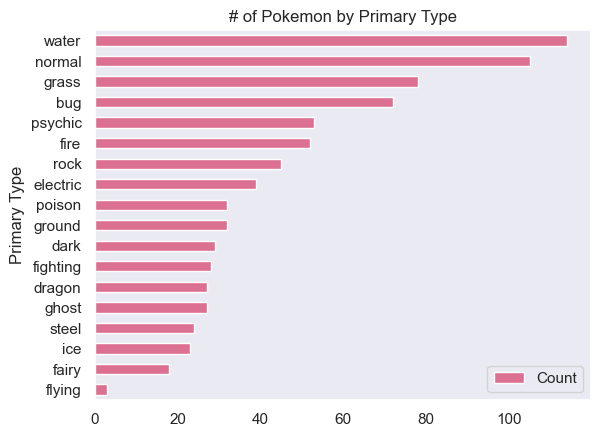

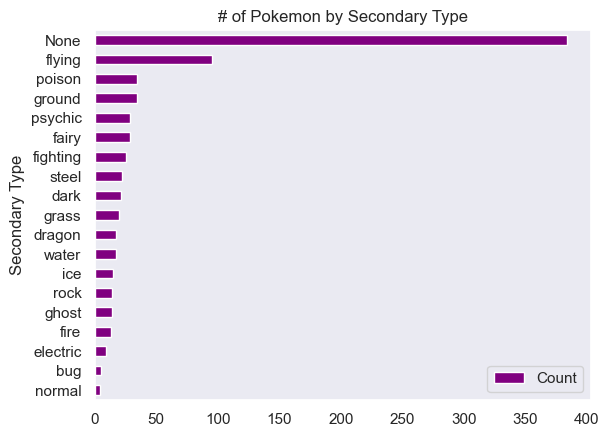

In [447]:
type_count=df[['type1','name']]\
                .rename(columns={'type1':'Primary Type','name':'Count'}) \
                .groupby('Primary Type')\
                .count()\
                .sort_values('Count',ascending=True)

type_count.plot(kind='barh', color='palevioletred')
plt.title('# of Pokemon by Primary Type')

plt.show()

type2_count=df[['type2','name']]\
                .rename(columns={'type2':'Secondary Type','name':'Count'}) \
                .groupby('Secondary Type')\
                .count()\
                .sort_values('Count',ascending=True)

type2_count.plot(kind='barh', color='purple')
plt.title('# of Pokemon by Secondary Type')
plt.legend(loc = 'lower right')

plt.show()

An interesting observation is *flying* is the least common Primary type, yet the most common Secondary type after None. *Fairy* is also one of the least common Primary types, yet most common Secondary types. We can explore this futher and learn a little bit more about our Pokemon by looking at type combinations.

<h3> What are the most common type combinations? </h3>

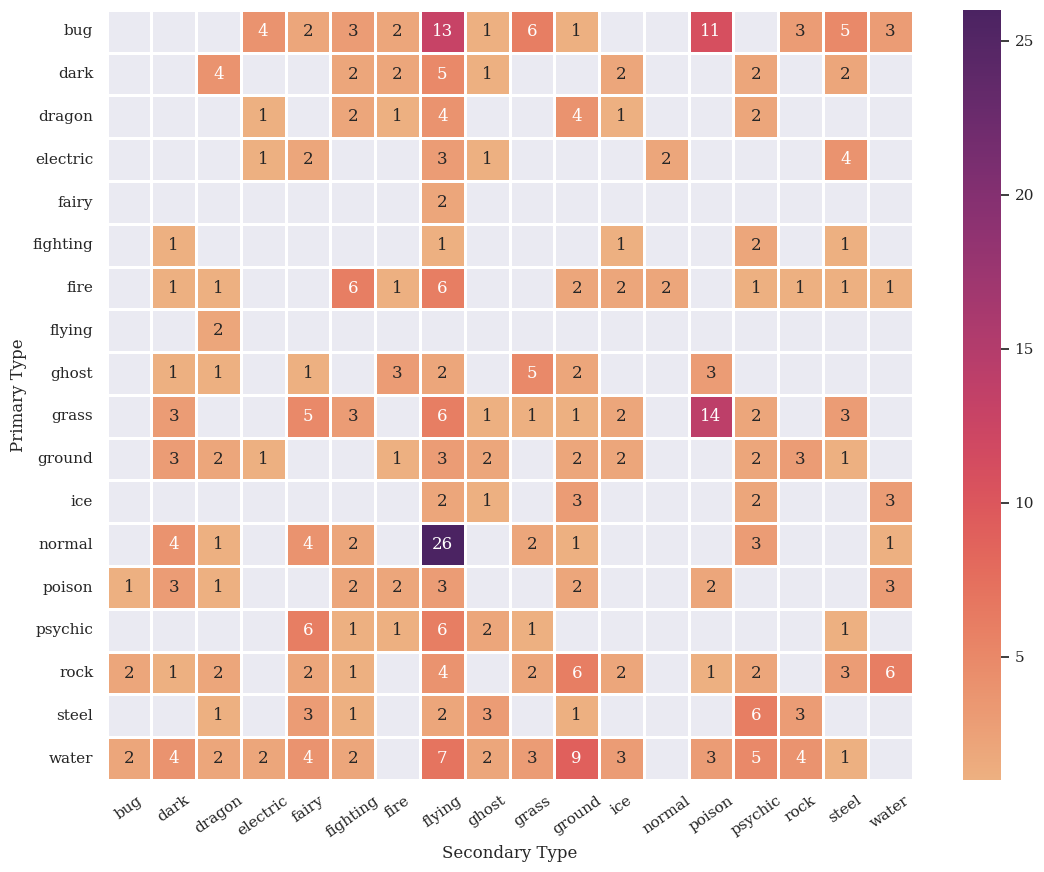

In [469]:
plt.subplots(figsize=(13, 10))

sns.heatmap(
    df[df['type2']!='None'].groupby(['type1', 'type2']).size().unstack(),
    linewidths=1,
    annot=True,
    cmap="flare"
)

plt.xlabel('Secondary Type')
plt.ylabel('Primary Type')
plt.xticks(rotation=35)
plt.show()

*Flying/Normal* is the most common dual-type Pokemon by a large margin. Next is *Grass/Poison* and *Flying/Bug*. Another chart I love to use to display this particular data is the Sankey chart. It's a little harder to get specific numbers out of it, but the proportions remain easy to note at a single glance.

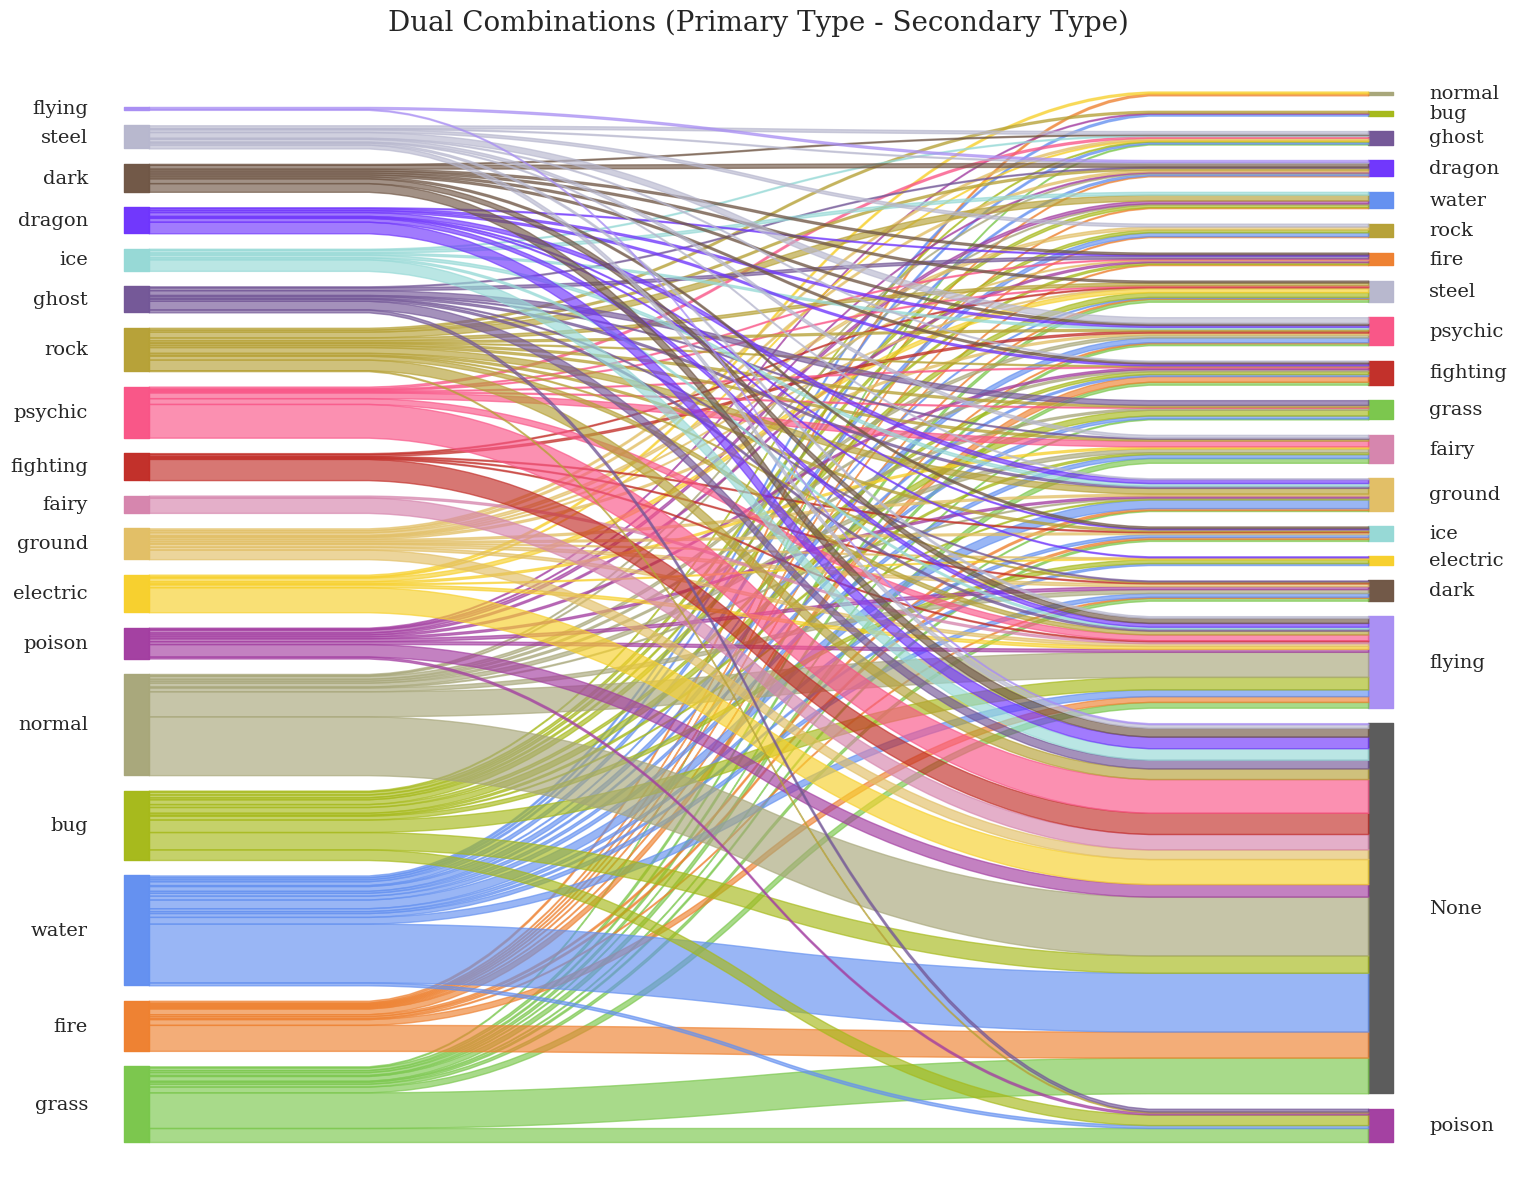

In [449]:
colours = {
	'normal': '#A8A77A',
	'fire': '#EE8130',
	'water': '#6390F0',
	'electric': '#F7D02C',
	'grass': '#7AC74C',
	'ice': '#96D9D6',
	'fighting': '#C22E28',
	'poison': '#A33EA1',
	'ground': '#E2BF65',
	'flying': '#A98FF3',
	'psychic': '#F95587',
	'bug': '#A6B91A',
	'rock': '#B6A136',
	'ghost': '#735797',
	'dragon': '#6F35FC',
	'dark': '#705746',
	'steel': '#B7B7CE',
	'fairy': '#D685AD',
    'None': '#5A5A5A'}

sequence1 = df["type1"].value_counts().sort_values(ascending=False).index.tolist()
sequence2 = df["type2"].value_counts().sort_values(ascending=False).index.tolist()
sankey(df["type1"], df["type2"], aspect=1,  fontsize=14, colorDict=colours)
plt.title("Dual Combinations (Primary Type - Secondary Type)", fontsize=20)
plt.gcf().set_size_inches((18, 15))



We can also look at Pokemon type by generation. In other words, how many Pokemon of type *n* were introduced with each generation?

<h3> What are the most common types by generation? </h3>

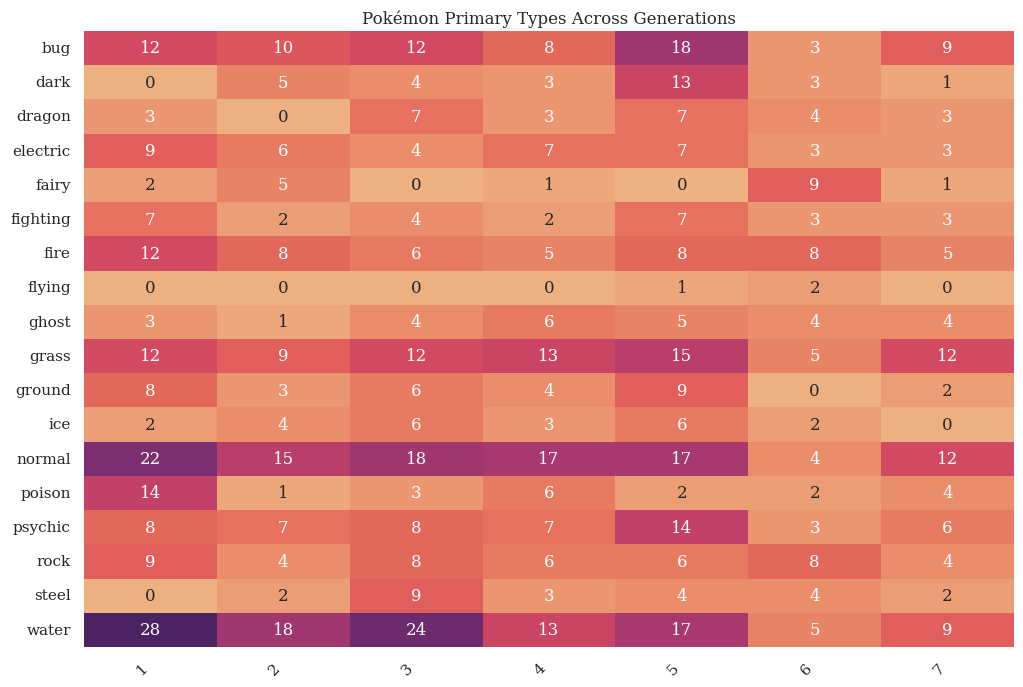

In [479]:

type1_by_generation = pd.crosstab(df['type1'], [df['generation']])

plt.figure(figsize=(12, 8))
sns.heatmap(type1_by_generation, annot=True, cbar=False, cmap='flare')
plt.title('Pokémon Primary Types Across Generations')
plt.xlabel('')
plt.ylabel('')
plt.xticks(rotation=45, ha='right')

plt.show()

It is clear *dark* types were not introduced until Gen 2, and *flying* types not until Gen 5. In any given generation, *water* and *normal* seem to be the most frequent. Other types, like *ice* and *flying*, seem relatively rare no matter the generation. Keep in mind, this chart is not adjusted for the size of the generation. The following chart will help better analyze the relative frequently of the Pokemon. 

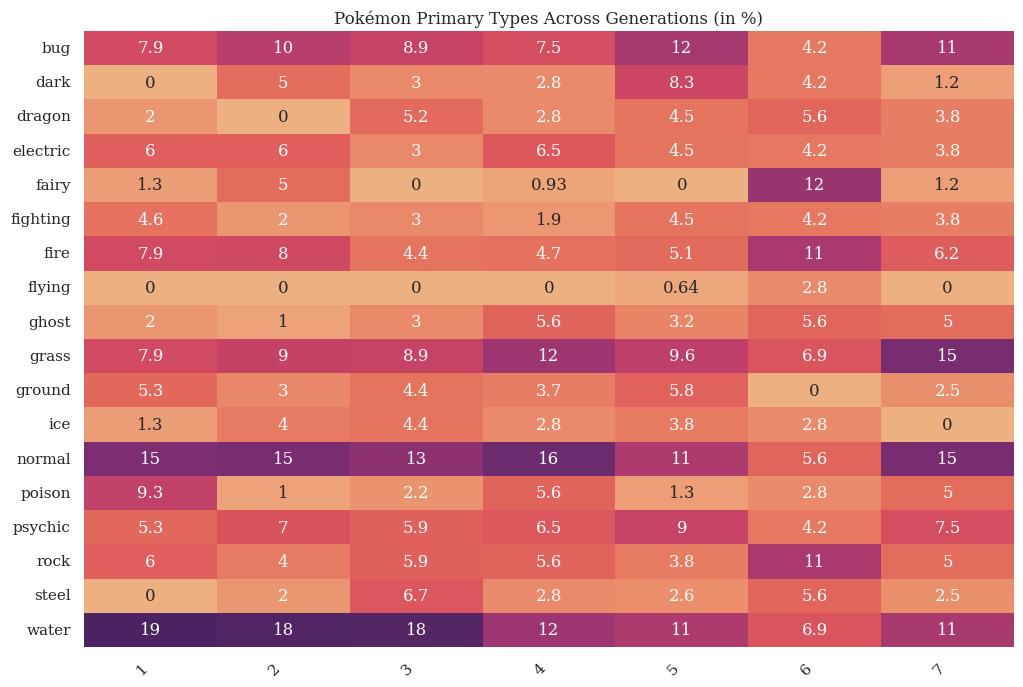

In [481]:
type1_by_generation = pd.crosstab(df['type1'], [df['generation']], normalize='columns') * 100

plt.figure(figsize=(12, 8))
sns.heatmap(type1_by_generation, annot=True, cbar=False, cmap='flare')
plt.title('Pokémon Primary Types Across Generations (in %)')
plt.xlabel('')
plt.ylabel('')
plt.xticks(rotation=45, ha='right')

plt.show()

No one type has ever made up more than 19% over a generation. The relative frequency of the types do generally stay wihin the saame range, save a few notable examples, such as *fairy* type making up 12% of Gen 6.

<h3> Why does Pokemon type matter, anyway? </h3>

Well, certain Pokemon fare better against others based on their types (in both attack and defense). A heatmap can better help visualize this.

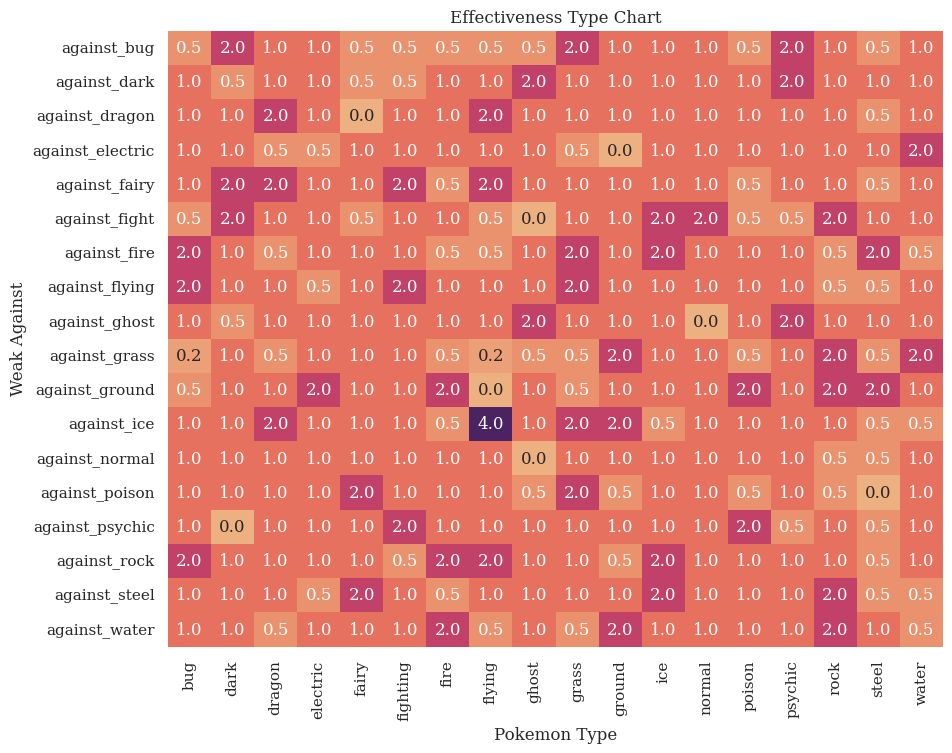

In [450]:
against_stats = [
'against_bug',
'against_dark',
'against_dragon',
'against_electric',
'against_fairy',
'against_fight',
'against_fire',
'against_flying',
'against_ghost',
'against_grass',
'against_ground',
'against_ice',
'against_normal',
'against_poison',
'against_psychic',
'against_rock',
'against_steel',
'against_water',
]

pokemon_type_effectiveness = df.groupby(['type1']).median()[against_stats].T

plt.figure(figsize=(10, 8))
sns.heatmap(pokemon_type_effectiveness, annot=True, cbar=False, cmap='flare', fmt='.1f', vmin=0, vmax=4)
plt.title('Effectiveness Type Chart')
plt.xlabel('Pokemon Type')
plt.xticks(rotation=90)
plt.ylabel('Weak Against')
plt.yticks(rotation=0)
plt.show()



An effectiveness >= 2.0 denotes weakness. It is clear *flying* is extremely weak against *ice*. *Electric*, on the other hand, is only weak against ground. Some types are also useless against others. For instance, poison does nothing against steel.

<h3> Base Stats By Type </h3>

Types do have varying stats, as demonstrated by a radar chart:

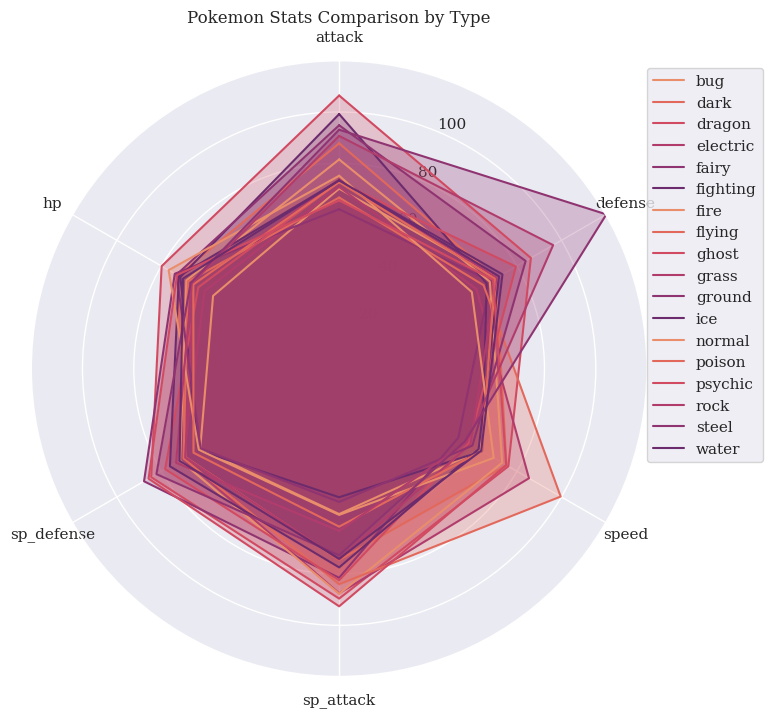

In [547]:
attributes = ['attack', 'defense', 'speed', 'sp_attack', 'sp_defense', 'hp']

avg_stats_by_type = df.groupby('type1')[attributes].mean()
radar_data = avg_stats_by_type.values.tolist()
categories = avg_stats_by_type.columns.tolist()

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)

for data, label in zip(radar_data, avg_stats_by_type.index):
    angles = np.linspace(0, 2 * np.pi, len(data), endpoint=False).tolist()
    data += [data[0]]  # Close the plot
    angles += [angles[0]]  # Close the plot
    ax.plot(angles, data, label=label)
    ax.fill(angles, data, alpha=0.25)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)
ax.set_yticks([20, 40, 60, 80, 100])
ax.set_ylim(0, 120)  # Adjust the ylim to zoom out
ax.set_title('Pokemon Stats Comparison by Type')
ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1))

plt.show()


As cool as this chart looks, it doesn't really tell us much other than the fact that the types' stats vary. This chart actually hides some very important information that we can see when we display the data more granularly.

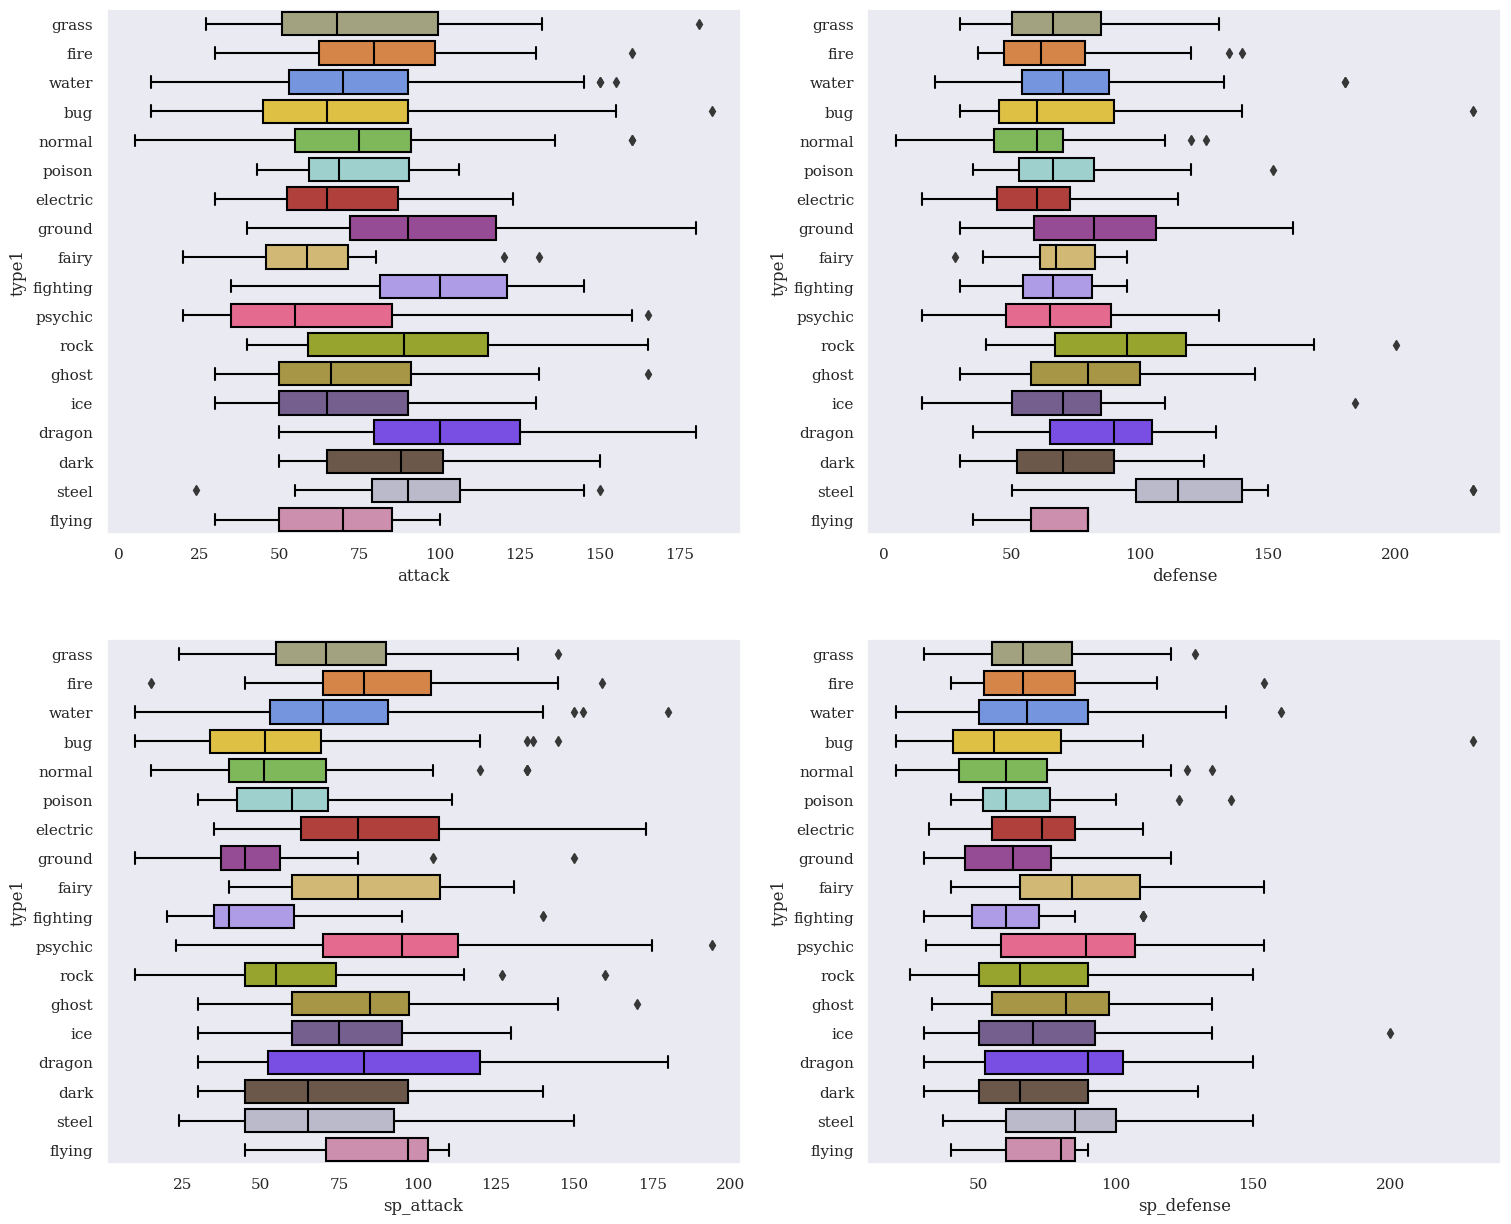

In [486]:
columns = ["attack", "defense", "sp_attack", "sp_defense"]
PROPS = {
    'boxprops':{'edgecolor':'black'},
    'medianprops':{'color':'black'},
    'whiskerprops':{'color':'black'},
    'capprops':{'color':'black'}
}
plt.figure(figsize=(18,15))
for i in range(4):
    plt.subplot(2,2,i+1)
    sns.boxplot(data = df, y="type1", x=columns[i], palette=list(colours.values()),**PROPS)
plt.show()

The types also boast differing averages for their base stats. *Steel*, *ground*, and *rock* all generally have higher defense stats. *Dragon* generally has the highest attack. Most interesting are the considerable outliers on the chart. Consider the outlying *bug* type Pokemon with the special defense over 200!

Charting the 6 base stats across all Pokemon shows a similar pattern:

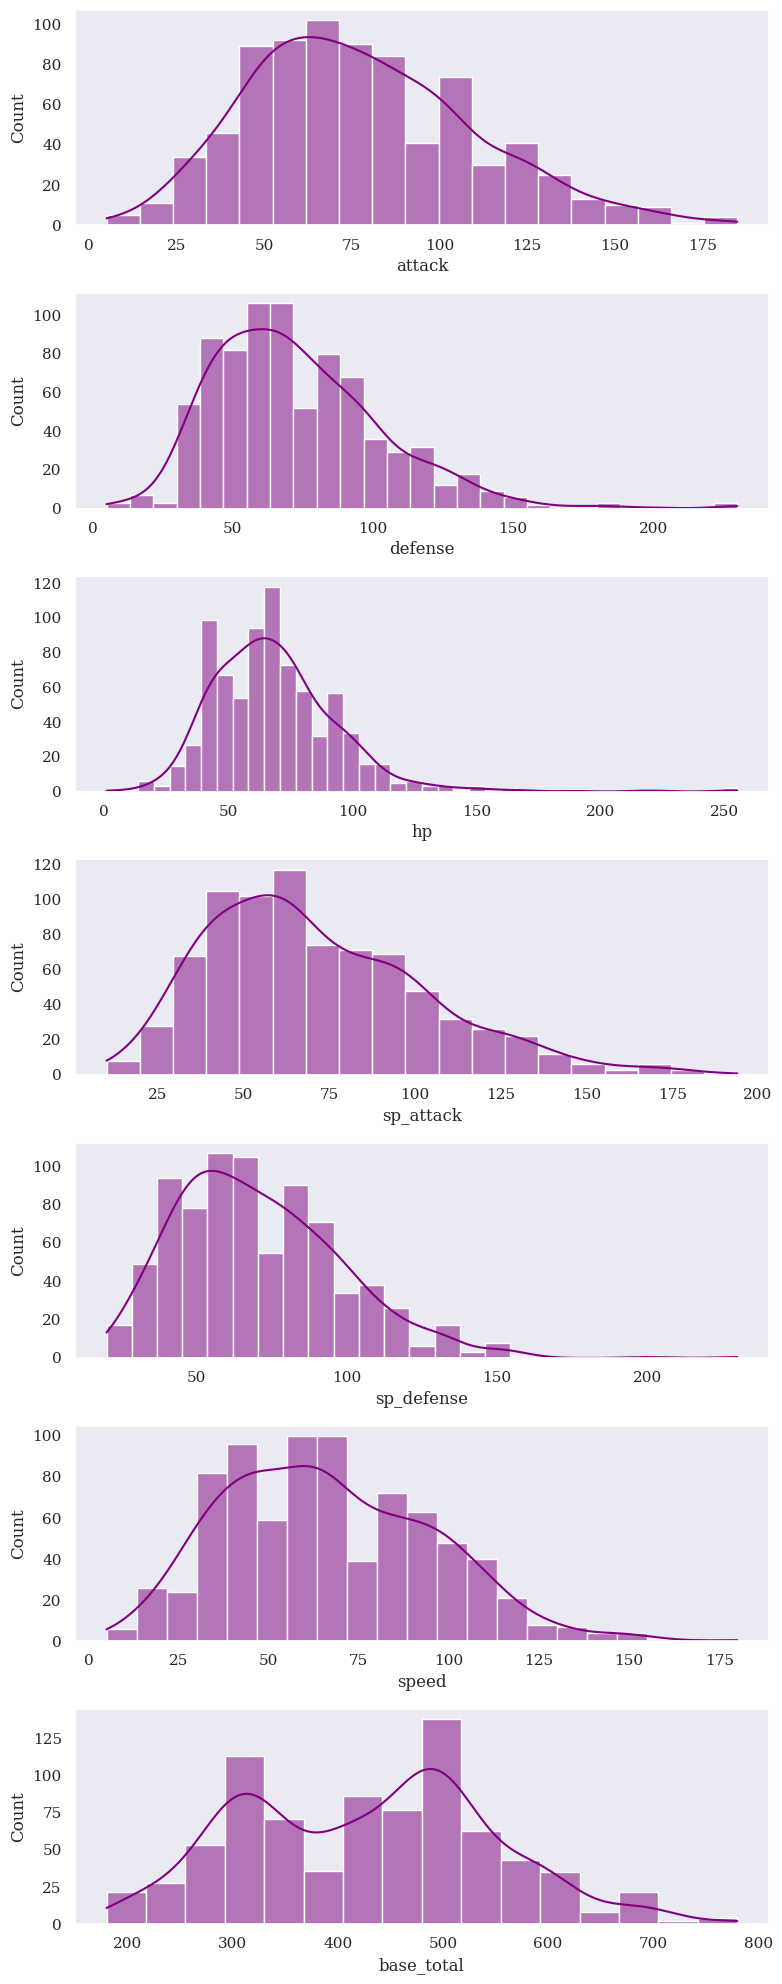

In [509]:
att_cols = ['attack', 'defense', 'hp', 'sp_attack', 'sp_defense', 'speed', 'base_total']

fig, axes = plt.subplots(nrows=7, ncols=1, figsize=(8, 20))

for i, col in enumerate(att_cols):
    sns.histplot(data=df, x=col, ax=axes[i], kde=True, color='purple')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

plt.tight_layout()
plt.show()


All the charts are positively skewed. The base_total distribution curve is also bimodal. This implies that there are two classes of Pokemon - one that is considerably stronger than the other. And this is actually true! 

<h2> What do we know about Legendary Pokemon? </h2>

An interesting fact about legendaries is that there is no real factor that distinguishes a legedary Pokemon from a non-legendary. They're generally stronger, but there exist some regular Pokemon that are stronger then legendaries. In this section, we aim to figure out as much as we can about legendaries and try to understand what differentiates them.

<h3> How common are legendaries? </h3>

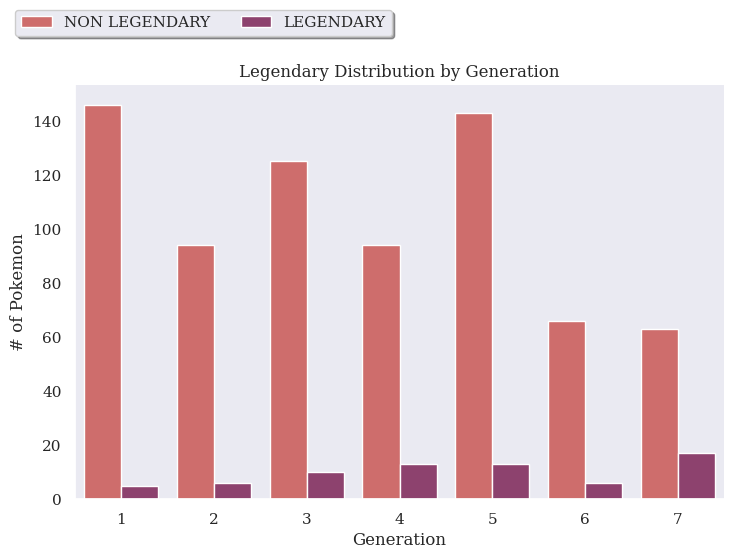

In [453]:
gen_distribution = sns.catplot(
    x='generation', 
    data=df,
    kind='count', 
    hue='is_legendary',
    palette='flare', 
    height=5, 
    aspect=1.5,
    legend=False,
    ).set_axis_labels('Generation', '# of Pokemon')

gen_distribution.ax.legend(loc='lower right', bbox_to_anchor=(0.5, 1.1),  shadow=True, ncol=2, labels=['NON LEGENDARY','LEGENDARY'])
plt.title('Legendary Distribution by Generation')
plt.show()

Legendaries are rare in all generations, although least common in Gen 1 and most common in Gen 7 (relative to non-legendaries). There is no significant trend here.

<h3> What types are most legendaries? </h3?>

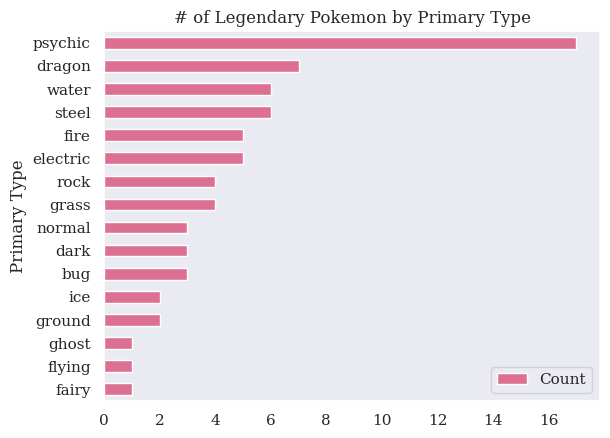

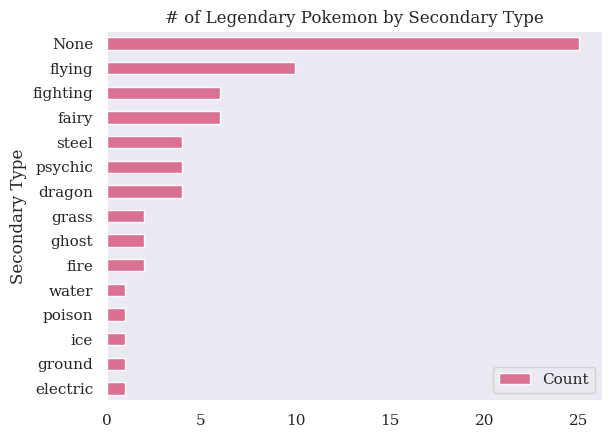

In [527]:
legendary_pokemon = df[df['is_legendary'] == 1]

type_count = legendary_pokemon[['type1', 'name']] \
    .rename(columns={'type1': 'Primary Type', 'name': 'Count'}) \
    .groupby('Primary Type') \
    .count() \
    .sort_values('Count', ascending=True)

type_count.plot(kind='barh', color='palevioletred')
plt.title('# of Legendary Pokemon by Primary Type')

plt.show()

type2_count = legendary_pokemon[['type2', 'name']] \
    .rename(columns={'type2': 'Secondary Type', 'name': 'Count'}) \
    .groupby('Secondary Type') \
    .count() \
    .sort_values('Count', ascending=True)

type2_count.plot(kind='barh', color='palevioletred')
plt.title('# of Legendary Pokemon by Secondary Type')

plt.show()


It seems legendaries have a different type distribution than non-legendaries. The most common primary type for legendaries are *psychic* and *dragon*. <br>
<br>
What I'm most interested in now are their stats. Are legendaries stronger than non-legendaries? They're supposed to be, but let's make sure.

<h3> Are legendaries stronger than regular Pokemon? </h3>

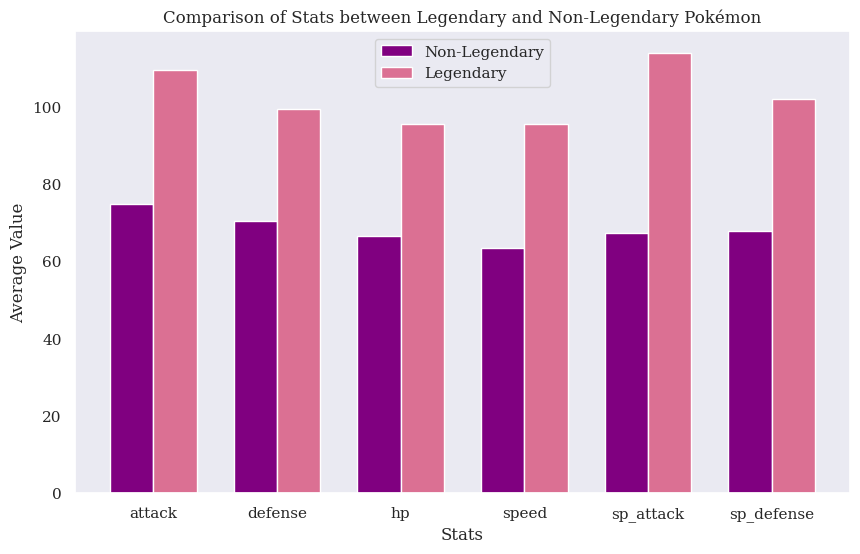

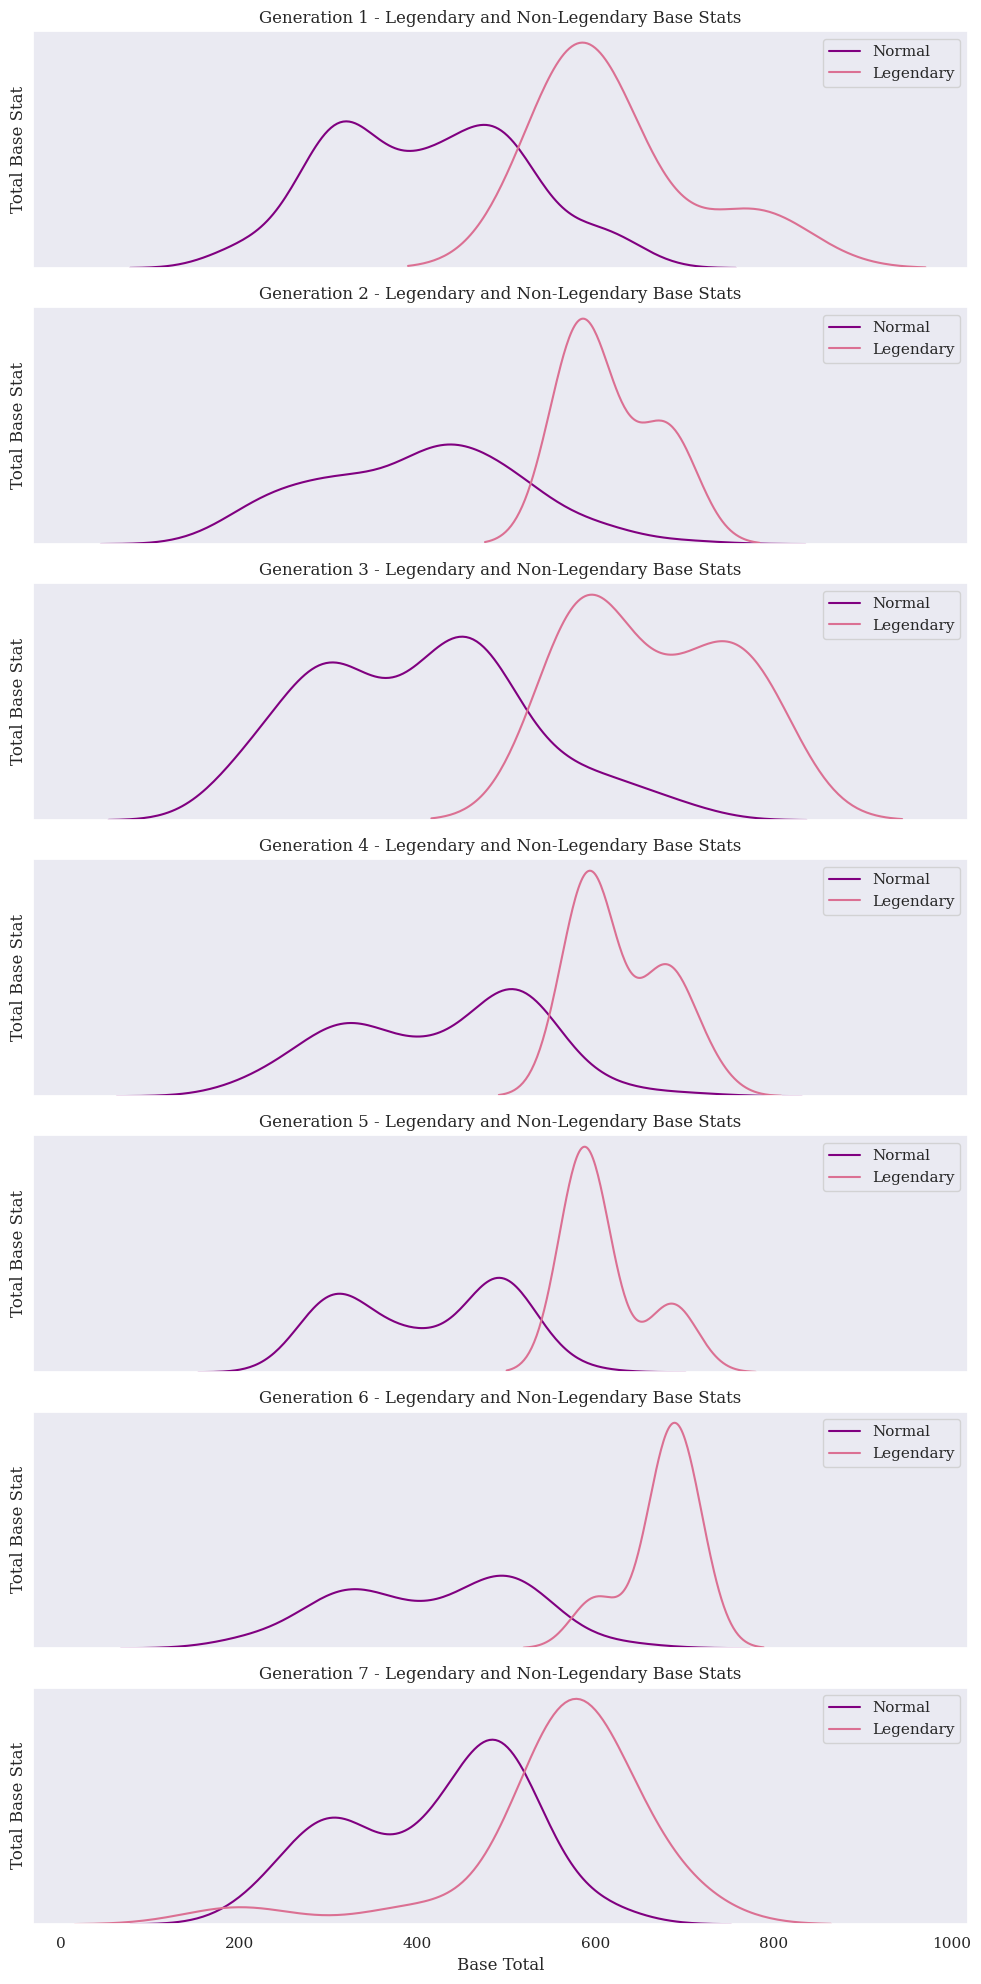

In [535]:
stats = ['attack', 'defense', 'hp', 'speed', 'sp_attack', 'sp_defense']

# Calculate the mean stats for legendary and non-legendary Pokémon
legendary_mean = df[df['is_legendary'] == 1][stats].mean()
non_legendary_mean = df[df['is_legendary'] == 0][stats].mean()

# Set the positions and width for the bars
bar_width = 0.35
r1 = np.arange(len(stats))
r2 = [x + bar_width for x in r1]

# Create a grouped bar plot
plt.figure(figsize=(10, 6))
plt.bar(r1, non_legendary_mean, color='purple', width=bar_width, label='Non-Legendary')
plt.bar(r2, legendary_mean, color='palevioletred', width=bar_width, label='Legendary')

# Add labels, title, and legend
plt.xlabel('Stats')
plt.ylabel('Average Value')
plt.title('Comparison of Stats between Legendary and Non-Legendary Pokémon')
plt.xticks([r + bar_width/2 for r in range(len(stats))], stats)
plt.legend()

plt.show()

fig, axes = plt.subplots(7, 1, figsize=(10, 20), sharex=True)

for i, gen in enumerate(range(1, 8)):
    ax = axes[i]
    normal_gen = normal_pokemon[normal_pokemon['generation'] == gen]
    legendary_gen = legendary_pokemon[legendary_pokemon['generation'] == gen]
    sns.kdeplot(data=normal_gen, x='base_total', color='purple', ax=ax, label='Normal')
    sns.kdeplot(data=legendary_gen, x='base_total', color='palevioletred', ax=ax, label='Legendary')
    
    ax.set_title(f'Generation {gen} - Legendary and Non-Legendary Base Stats')
    ax.set_xlabel('Base Total')
    ax.set_ylabel('Density')
    
    ax.set_yticks([])
    ax.set_ylabel('Total Base Stat')
    ax.legend()


plt.tight_layout()
plt.show()



Clearly the legendary Pokemon are much stronger than the non-legendaries in every generation. The bimodal distributions in the Legendary curves for all generations but Gen 7 suggests that legendaries are not all made equal, either. Now, let dig a little deeper into these stats.

<h3> Legendary Vs Non-Legendary (Stats Comparison) </h3>

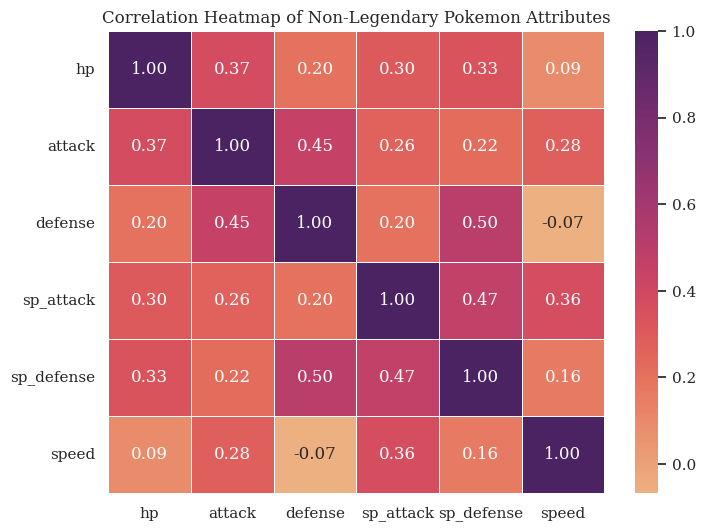

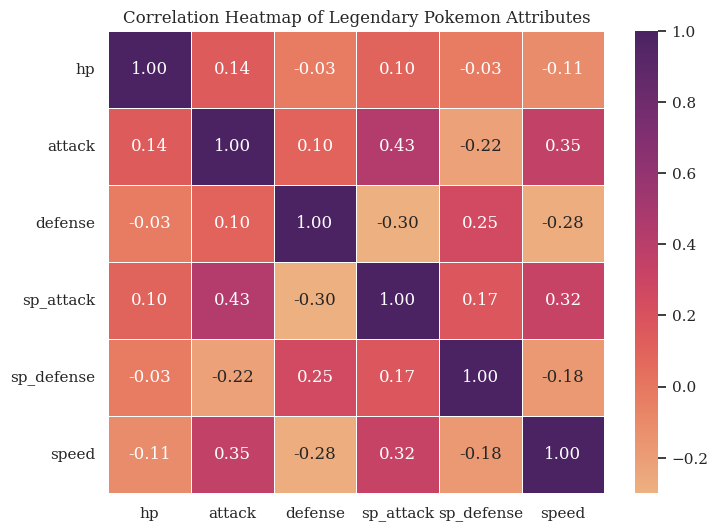

In [471]:
# Non-legendary
non_legendary_df = df[df['is_legendary'] == 0]

heatmap_attributes = ['hp', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed']

correlation_matrix = non_legendary_df[heatmap_attributes].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='flare', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Non-Legendary Pokemon Attributes')
plt.show()

# Legendaries
legendary_df = df[df['is_legendary'] == 1]

heatmap_attributes = ['hp', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed']

correlation_matrix = legendary_df[heatmap_attributes].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='flare', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Legendary Pokemon Attributes')
plt.show()

For non-legendary Pokemon, there exists a positive relationship between hp and sp_attack, sp_defense and attack. Surprisingly, this relationship is less significant for defense. You would think a Pokemon with high defense would also generally have a higher hp. <br>
<br>
This relationship turns negative for legendary Pokemon. This makes sense, as a legendary Pokemon is likely to have an extremely high value for a particular stat. This also highlights unique battle strategies and characteristics of legendary Pokémon, as they often possess a balance of offensive power, defensive capabilities, and speed.

<h3> Which type has the strongest legendaries and non-legendaries? </h3>

<Figure size 640x480 with 0 Axes>

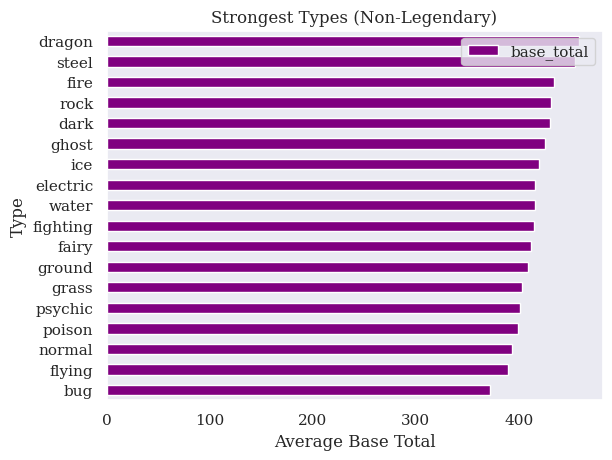

<Figure size 640x480 with 0 Axes>

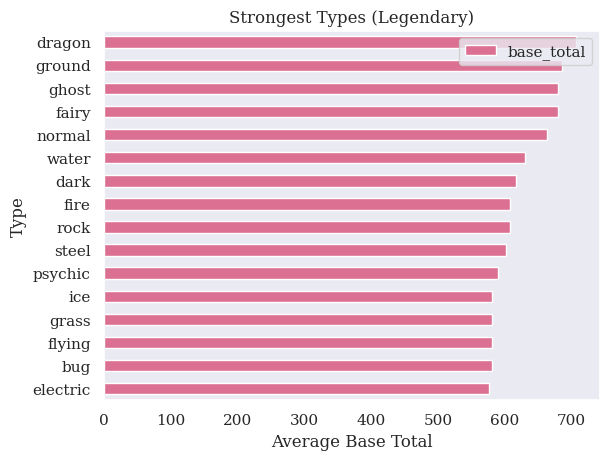

In [529]:
strongest_non = df[df['is_legendary'] == 0]
strongest_non = strongest_non[['name', 'type1', 'base_total']].groupby('type1').mean('base_total').sort_values('base_total')

plt.figure()
strongest_non.plot(kind='barh', color='purple')
plt.title('Strongest Types (Non-Legendary)')
plt.xlabel('Average Base Total')
plt.ylabel('Type')
plt.show()

strongest_leg = df[df['is_legendary'] == 1]
strongest_leg = strongest_leg[['name', 'type1', 'base_total']].groupby('type1').mean('base_total').sort_values('base_total')

plt.figure()
strongest_leg.plot(kind='barh', color='palevioletred')
plt.title('Strongest Types (Legendary)')
plt.xlabel('Average Base Total')
plt.ylabel('Type')
plt.show()


 *Dragon* tops the charts for both legendary and non-legendaries. *Bug*, *flying*, and *grass* also remain some of the weakest types irrespective of legendary status. Interestingly, *electric* legendaries are the weakest, while *electric* non-legendaries are 6th strongest!

<h2> The Strongest Pokemon </h3>

<h3> Who are the strongest & weakest Pokemon? </h3>

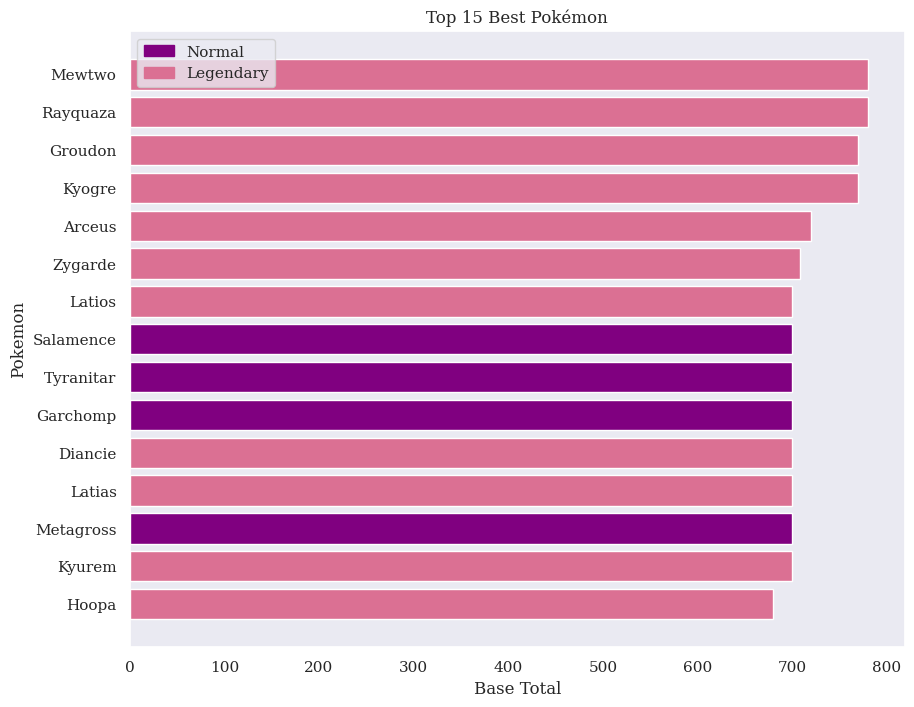

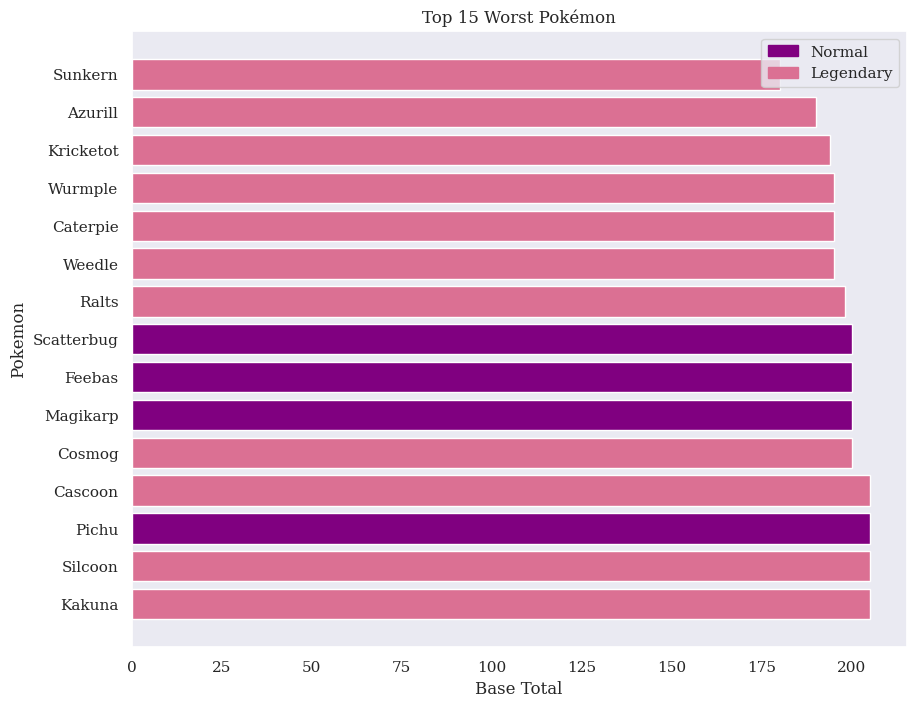

In [538]:
# Top Best
top_15_best = df.sort_values('base_total', ascending=False).head(15)

colors = np.where(top_15_best['is_legendary'], 'palevioletred', 'purple')

plt.figure(figsize=(10, 8))
plt.barh(top_15_best['name'][::-1], top_15_best['base_total'][::-1], color=colors[::-1])
plt.xlabel('Base Total')
plt.ylabel('Pokemon')
plt.title('Top 15 Best Pokémon')
plt.legend(handles=[plt.Rectangle((0, 0), 1, 1, color='purple'), plt.Rectangle((0, 0), 1, 1, color='palevioletred')],
           labels=['Normal', 'Legendary'], loc = 'upper left')
plt.show()

# Top Worst
bottom_15_worst = df.sort_values('base_total', ascending=True).head(15)

plt.figure(figsize=(10, 8))
plt.barh(bottom_15_worst['name'][::-1], bottom_15_worst['base_total'][::-1], color=colors[::-1])
plt.xlabel('Base Total')
plt.ylabel('Pokemon')
plt.title('Top 15 Worst Pokémon')
plt.legend(handles=[plt.Rectangle((0, 0), 1, 1, color='purple'), plt.Rectangle((0, 0), 1, 1, color='palevioletred')],
           labels=['Normal', 'Legendary'], loc='upper right')
plt.show()



<h3> How much stronger is a strong Pokemon than a weak Pokemon? </h3>

Nearly all the distributions we have looked at has been bimodal, even within legendaries. This means we can think about Pokemons in 'tiers', with some being significantly stronger than others. We can best show the magnitude of this different using a radar chart to chart a Pokemon's individual stats. 

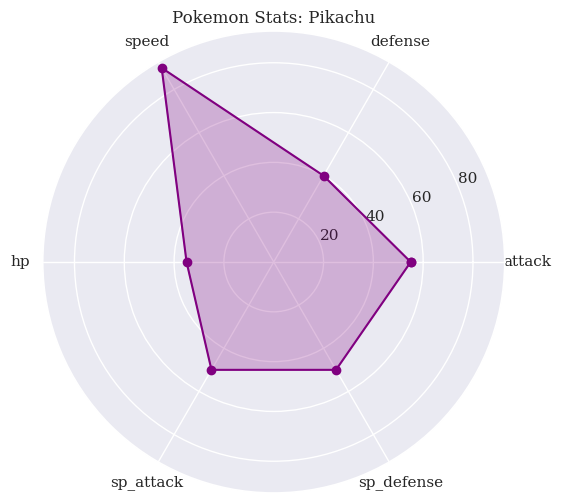

In [551]:
radar_attributes = ['attack', 'defense', 'speed', 'hp', 'sp_attack', 'sp_defense']

selected_pokemon = df[df['name'] == 'Pikachu']

values = selected_pokemon[radar_attributes].values.flatten().tolist()
values += values[:1] 

angles = np.linspace(0, 2 * np.pi, len(radar_attributes), endpoint=False).tolist()
angles += angles[:1] 

plt.figure(figsize=(6, 6))
plt.polar(angles, values, marker='o', color='purple')
plt.fill(angles, values, alpha=0.25, color='purple')
plt.xticks(angles[:-1], radar_attributes)
plt.title('Pokemon Stats: Pikachu')

plt.show()


Now what happens if we compare the tail ends of each tier? Well...

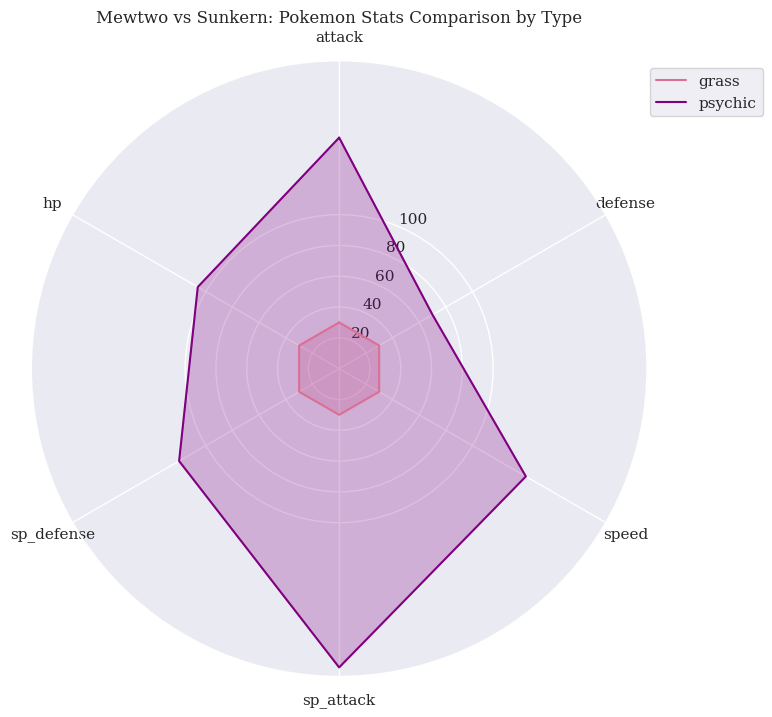

In [553]:
attributes = ['attack', 'defense', 'speed', 'sp_attack', 'sp_defense', 'hp']

pokemon_data = df[df['name'].isin(['Mewtwo', 'Sunkern'])]

avg_stats_by_type = pokemon_data.groupby('type1')[attributes].mean()

radar_data = avg_stats_by_type.values.tolist()
categories = avg_stats_by_type.columns.tolist()

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)

for i, (data, label) in enumerate(zip(radar_data, avg_stats_by_type.index)):
    angles = np.linspace(0, 2 * np.pi, len(data), endpoint=False).tolist()
    data += [data[0]]  # Close the plot
    angles += [angles[0]]  # Close the plot
    color = 'palevioletred' if i == 0 else 'purple'
    ax.plot(angles, data, label=label, color=color)
    ax.fill(angles, data, alpha=0.25, color=color)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)
ax.set_yticks([20, 40, 60, 80, 100])
ax.set_ylim(0, 200)  # Adjust the ylim to zoom out
ax.set_title('Mewtwo vs Sunkern: Pokemon Stats Comparison by Type')
ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1))

plt.show()


Well, that's a big difference. All Pokemons really aren't made equal.

<h2> Fun Trivia Question! </h2>

<h3> Are heavier Pokémon stronger? </h3>


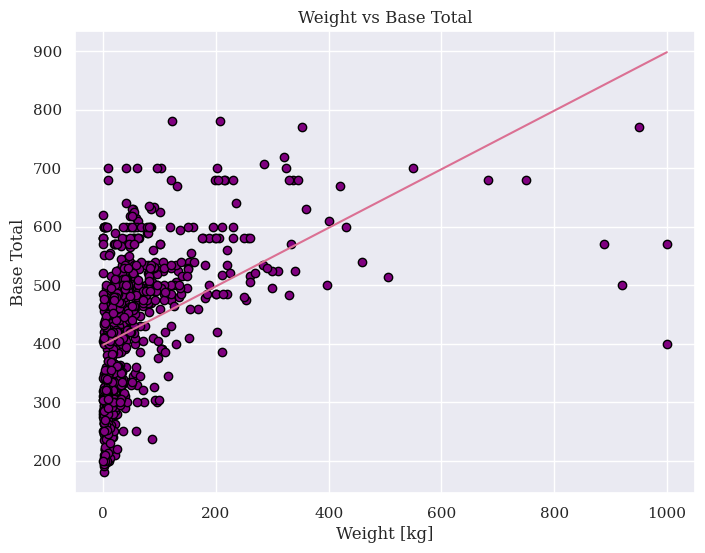

In [557]:
# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df['weight_kg'], df['base_total'], color='purple', edgecolor='black')
plt.xlabel('Weight [kg]')
plt.ylabel('Base Total')

# Regression line
coefficients = np.polyfit(df['weight_kg'], df['base_total'], 1)
polynomial = np.poly1d(coefficients)
x = np.linspace(df['weight_kg'].min(), df['weight_kg'].max(), 100)
plt.plot(x, polynomial(x), color='palevioletred')

plt.title('Weight vs Base Total')
plt.grid(True)
plt.show()


A few outliers skew the picture, but they seem to be.